In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas_profiling as pp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import json
import folium
import squarify

In [4]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\nitishkumar\Desktop\P\Data-\NLP'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\nitishkumar\Desktop\P\Data-\NLP\20190928-reviews.csv.zip
C:\Users\nitishkumar\Desktop\P\Data-\NLP\items.csv
C:\Users\nitishkumar\Desktop\P\Data-\NLP\reviews.csv


In [5]:
items_list = pd.read_csv(r'C:\Users\nitishkumar\Desktop\P\Data-\NLP\items.csv')
reviews = pd.read_csv(r'C:\Users\nitishkumar\Desktop\P\Data-\NLP\reviews.csv')

In [9]:
items_list.shape


(82815, 8)

In [10]:
reviews.shape

(82815, 8)

In [13]:
pp.ProfileReport(items_list)

In [14]:
reviews

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
82810,B07WXKWDT2,Prabhakaran,5,"September 24, 2019",True,International version. Will require USA adapte...,Best phone at this price.,NaN
82811,B07WXKWDT2,rvwonder,3,"September 17, 2019",False,Be careful of International Version if Using T...,If you intend to use this phone on T Mobile be...,NaN
82812,B07WXKWDT2,markw707,1,"September 8, 2019",False,Moto G7 Play Freezes Every Time I Use It.,Here is my Moto G7 Play complaint: It freezes ...,NaN
82813,B07WXKWDT2,Amazon Customer,1,"September 13, 2019",False,Camera is not good,As far as function works great camera no go wo...,NaN


In [16]:
items_list


,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN
...,...,...,...,...,...,...,...,...,...
787,B07WFJ6HRF,Apple,"Apple iPhone XS, 512GB, Gold - For Verizon (Re...",https://www.amazon.com/Apple-iPhone-XS-512GB-G...,https://m.media-amazon.com/images/I/71kt40Gjzt...,3.7,https://www.amazon.com/product-reviews/B07WFJ6HRF,50,"$999.95,$1,349.99"
788,B07WKSVF6X,Samsung,"Samsung Galaxy A50 128GB, 4GB RAM 6.4"" Display...",https://www.amazon.com/Samsung-A50-Display-Fac...,https://m.media-amazon.com/images/I/61HyCNLJ2+...,4.7,https://www.amazon.com/product-reviews/B07WKSVF6X,7,$304.99
789,B07WVRJQ7V,Samsung,"Samsung Galaxy S9 (64GB, 4GB RAM) 5.8"" QHD+ Di...",https://www.amazon.com/Samsung-Galaxy-S9-Displ...,https://m.media-amazon.com/images/I/71EpwFTgLO...,2.0,https://www.amazon.com/product-reviews/B07WVRJQ7V,1,$519.99
790,B07WXKWDT2,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99


In [30]:
df = pd.merge(reviews, items_list, how="left", left_on="asin", right_on="asin")

In [31]:
df

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,url,image,rating_y,reviewUrl,totalReviews,prices
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82810,B07WXKWDT2,Prabhakaran,5,"September 24, 2019",True,International version. Will require USA adapte...,Best phone at this price.,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99
82811,B07WXKWDT2,rvwonder,3,"September 17, 2019",False,Be careful of International Version if Using T...,If you intend to use this phone on T Mobile be...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99
82812,B07WXKWDT2,markw707,1,"September 8, 2019",False,Moto G7 Play Freezes Every Time I Use It.,Here is my Moto G7 Play complaint: It freezes ...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99
82813,B07WXKWDT2,Amazon Customer,1,"September 13, 2019",False,Camera is not good,As far as function works great camera no go wo...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99


In [34]:
df.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace = True)

In [35]:
df

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82810,B07WXKWDT2,Prabhakaran,5,"September 24, 2019",True,International version. Will require USA adapte...,Best phone at this price.,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99
82811,B07WXKWDT2,rvwonder,3,"September 17, 2019",False,Be careful of International Version if Using T...,If you intend to use this phone on T Mobile be...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99
82812,B07WXKWDT2,markw707,1,"September 8, 2019",False,Moto G7 Play Freezes Every Time I Use It.,Here is my Moto G7 Play complaint: It freezes ...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99
82813,B07WXKWDT2,Amazon Customer,1,"September 13, 2019",False,Camera is not good,As far as function works great camera no go wo...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99


In [36]:
from datetime import datetime

In [37]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Janet,3,2005-10-11,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0000SX2UC,Luke Wyatt,1,2004-01-07,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
2,B0000SX2UC,Brooke,5,2003-12-30,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
3,B0000SX2UC,amy m. teague,3,2004-03-18,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
4,B0000SX2UC,tristazbimmer,4,2005-08-28,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82810,B07WXKWDT2,Prabhakaran,5,2019-09-24,True,International version. Will require USA adapte...,Best phone at this price.,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99
82811,B07WXKWDT2,rvwonder,3,2019-09-17,False,Be careful of International Version if Using T...,If you intend to use this phone on T Mobile be...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99
82812,B07WXKWDT2,markw707,1,2019-09-08,False,Moto G7 Play Freezes Every Time I Use It.,Here is my Moto G7 Play complaint: It freezes ...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99
82813,B07WXKWDT2,Amazon Customer,1,2019-09-13,False,Camera is not good,As far as function works great camera no go wo...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99


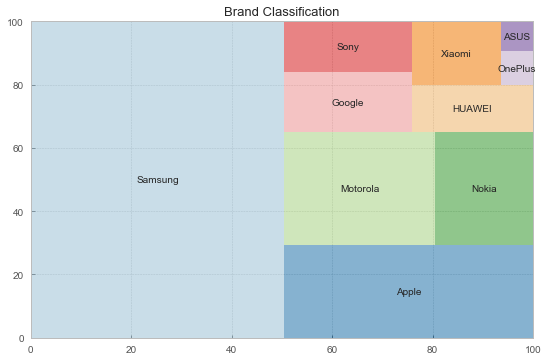

In [86]:
with plt.style.context('bmh'):
    f = plt.figure(figsize = (9,9))
    ax = plt.subplot2grid((3,3),(0,0), colspan = 3, rowspan = 2)
    #df_train[['Longitude', 'Latitude']].plot.hexbin(x='Longitude', y = 'Latitude', gridsize = 10, vmin = 100, vmax = 700, ax = ax)
    #ax.text(80, 40, 'India', color = 'red')
    #ax.text(-100, 45, 'USA', color = 'red')
    #ax.text(0,5, 'Missing Pos', color = 'grey')
    #ax.set_title('Controlled Plot')
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    cnt = df['brand'].value_counts().to_frame()
    squarify.plot(sizes = cnt.values, label = cnt.index,
                  color = sns.color_palette('Paired', 11), alpha = 0.5, ax = ax)
    ax.set_title("Brand Classification", fontsize = 13)
    plt.show()

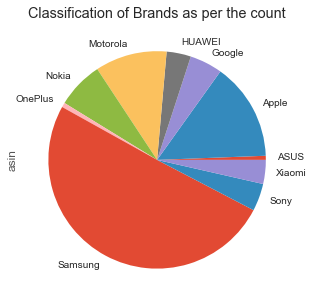

In [87]:
plt.style.use("ggplot")
# Brand distribution
ax = df.groupby("brand").count()["asin"].plot(kind="pie", 
                                                 figsize=(8, 5),
                                                 title="Classification of Brands as per the count")
plt.show()

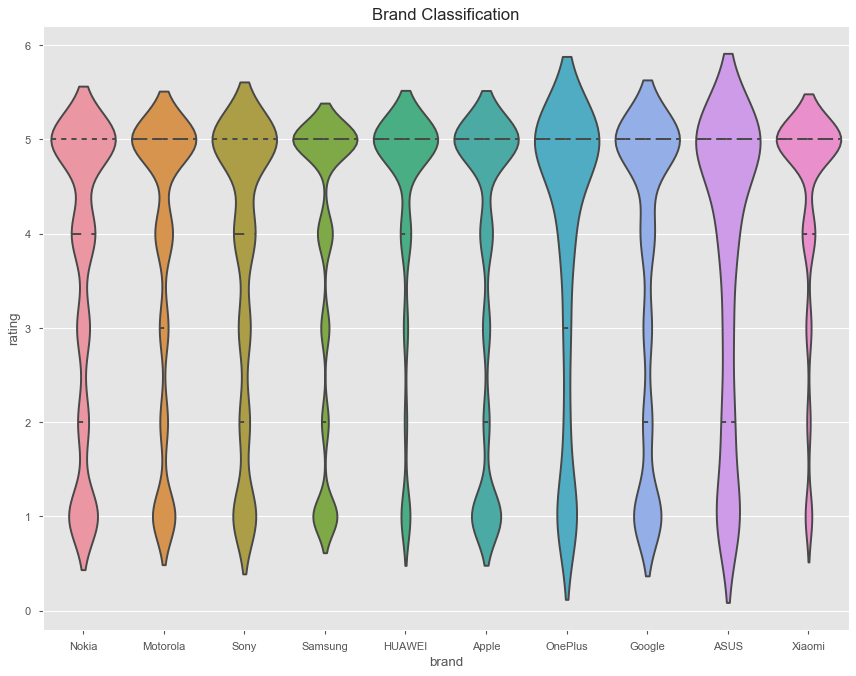

In [124]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='brand', y='rating', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Brand Classification', fontsize=15)
plt.show()

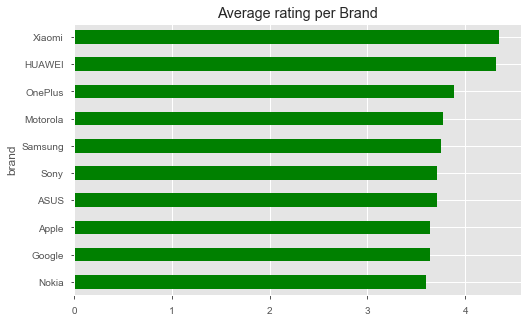

In [130]:
# Average rating per brand
ax = df.groupby("brand").mean()["rating"].sort_values().plot
(kind="barh",figsize=(8,5), title="Average rating per Brand",color = 'green')
plt.show()

In [120]:
df.shape

(82815, 16)

In [121]:
df.isna().sum()

asin                  0
name                  5
rating                0
date                  0
verified              0
title                10
body                 20
helpfulVotes      49681
brand                 0
item_title            0
url                   0
image                 0
overall_rating        0
reviewUrl             0
totalReviews          0
prices            23670
dtype: int64

In [131]:
df['Month'] = df['date'].dt.month

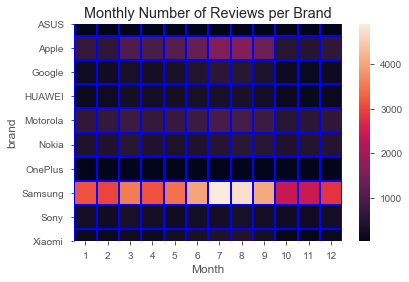

In [143]:
ax = plt.axes()
data = df.pivot_table(index='brand', columns='Month', values='asin',aggfunc="count")
ax = sns.heatmap(data, ax=ax,linecolor='blue', linewidth=1)
ax.set_title('Monthly Number of Reviews per Brand')
plt.show()

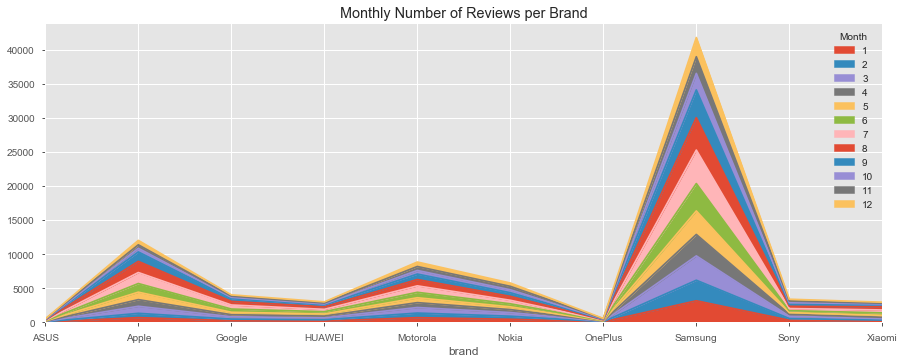

In [165]:
pd.pivot_table(df, 
                    index="brand", 
                    columns="Month", 
                    values="asin", 
                    aggfunc="count", 
                    fill_value=0).plot.area(title="Monthly Number of Reviews per Brand", figsize=(15, 5.5))

In [167]:
df["positivity"] = reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))

In [168]:
df

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,prices,Month,positivity
0,B0000SX2UC,Janet,3,2005-10-11,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,10,0
1,B0000SX2UC,Luke Wyatt,1,2004-01-07,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,1,-1
2,B0000SX2UC,Brooke,5,2003-12-30,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,12,1
3,B0000SX2UC,amy m. teague,3,2004-03-18,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,3,0
4,B0000SX2UC,tristazbimmer,4,2005-08-28,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82810,B07WXKWDT2,Prabhakaran,5,2019-09-24,True,International version. Will require USA adapte...,Best phone at this price.,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99,9,1
82811,B07WXKWDT2,rvwonder,3,2019-09-17,False,Be careful of International Version if Using T...,If you intend to use this phone on T Mobile be...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99,9,0
82812,B07WXKWDT2,markw707,1,2019-09-08,False,Moto G7 Play Freezes Every Time I Use It.,Here is my Moto G7 Play complaint: It freezes ...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99,9,-1
82813,B07WXKWDT2,Amazon Customer,1,2019-09-13,False,Camera is not good,As far as function works great camera no go wo...,NaN,Motorola,"Motorola Moto G7 Play (32GB, 2GB RAM) 5.7"" HD+...",https://www.amazon.com/Motorola-Vision-Display...,https://m.media-amazon.com/images/I/51xgfG4A28...,3.0,https://www.amazon.com/product-reviews/B07WXKWDT2,5,$139.99,9,-1
